In [19]:
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(3)

In [20]:
def inference(w, b, x):
    return w*x + b

def cal_step_gradient(batch_x_list, batch_y_list, w, b, lr):
    avg_dw, avg_db = 0, 0
    batch_size = len(batch_x_list)
    pred_y = inference(w,b,batch_x_list)
    avg_dw = (1. / batch_size) * ((pred_y - batch_y_list)*batch_x_list).sum()
    avg_db = (1. / batch_size) * ((pred_y - batch_y_list).sum())
    
    w -= avg_dw * lr
    b -= avg_db * lr
    return w, b

In [34]:
def eval_loss(w, b, x_list, gt_y_list):
    avg_loss = 0.0
    avg_loss += (0.5 * (w * x_list + b - gt_y_list) ** 2).sum() / len(x_list)
    return avg_loss

In [42]:
def train (x_list, gt_y_list, batch_size, lr, max_iter):
    w = 0
    b = 0
    num_samples = 100;
    for i in range(max_iter):
        batch_idxs = np.random.choice(len(x_list), batch_size)
        batch_x = np.array([x_list[j] for j in batch_idxs])
        batch_y = np.array([gt_y_list[j] for j in batch_idxs])
        w, b = cal_step_gradient(batch_x, batch_y, w, b, lr)                     #更新参数
        if i % 10 == 0:
            print('w:{0}, b{0}'.format(w, b))
            print('loss is {0}'.format(eval_loss(w, b, x_list, gt_y_list)))
            plt.figure()
            plt.scatter(x_list,y_list)
            plt.plot(x_list,inference(w,b,x_list))



In [45]:
def generate_sample_data():
    w = random.randint(0,10) + random.random()      #生成[0,10]整数，与若干偏差
    b = random.randint(0,5) + random.random()
    num_samples = 100
    x_list = []
    y_list = []
    for i in range(num_samples):
        x = random.randint(0,100) * random.random()
        y = w * x + b + random.random() * random.randint(-1, 1)*16
        x_list.append(x)
        y_list.append(y)
    x_list = np.array(x_list)
    y_list = np.array(y_list)        
    return x_list, y_list, w, b

w:7.97957717143822, b7.97957717143822
loss is 866.4552470136166
w:9.261262982704336, b9.261262982704336
loss is 19.391634981494136
w:9.334787932454926, b9.334787932454926
loss is 19.17052116579398
w:9.29620052516466, b9.29620052516466
loss is 18.63134728209682
w:9.299775860408317, b9.299775860408317
loss is 18.618091700254947
w:9.29783649034099, b9.29783649034099
loss is 18.62026302651661
w:9.294534619385095, b9.294534619385095
loss is 18.63627508641345
w:9.28609264998335, b9.28609264998335
loss is 18.72827259825885
w:9.352117381193079, b9.352117381193079
loss is 19.837262268591417
w:9.261940067320412, b9.261940067320412
loss is 19.38099998278454
w:9.32437856103621, b9.32437856103621
loss is 18.84468262137817
w:9.285295245378538, b9.285295245378538
loss is 18.7390290572748
w:9.288262240038653, b9.288262240038653
loss is 18.694341642769693
w:9.286921511833857, b9.286921511833857
loss is 18.712883177015218
w:9.334742532809457, b9.334742532809457
loss is 19.107398305010165
w:9.32387289880

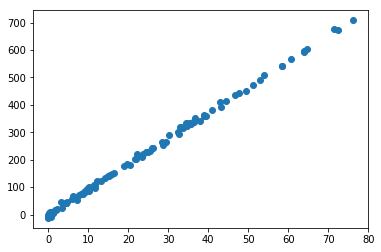

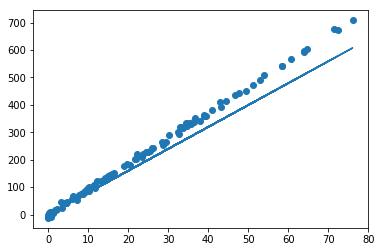

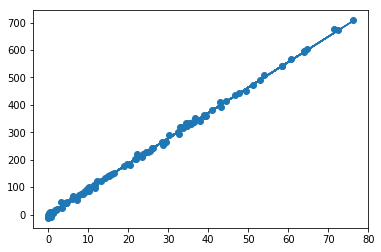

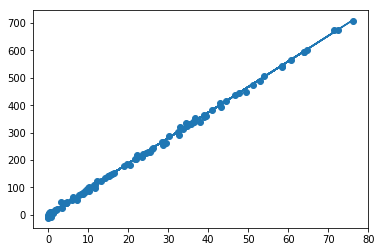

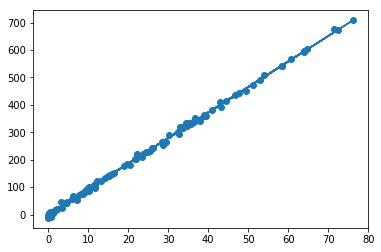

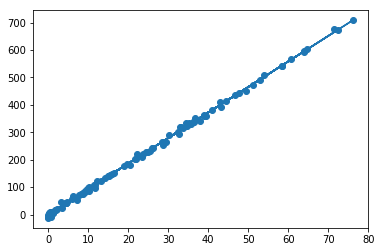

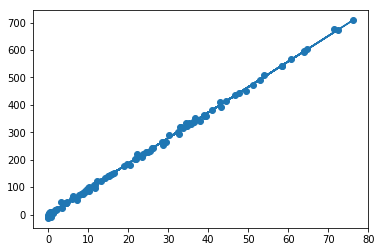

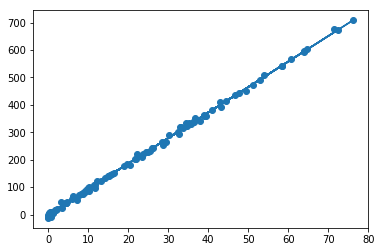

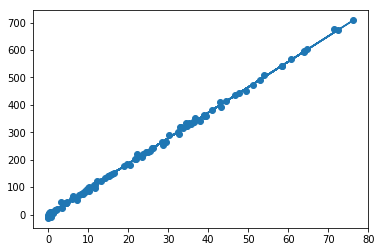

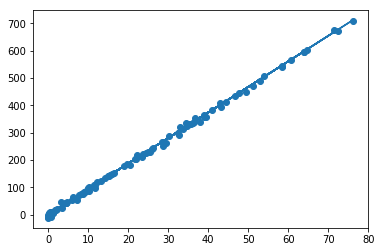

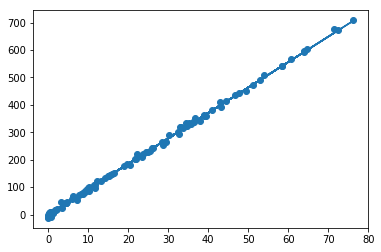

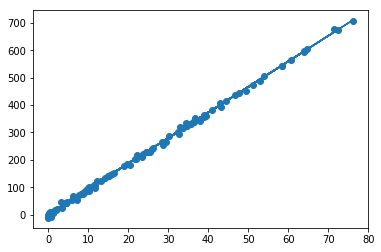

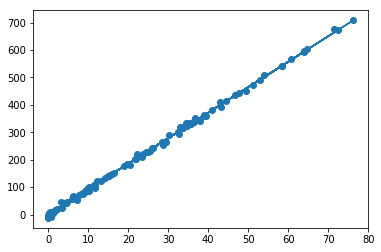

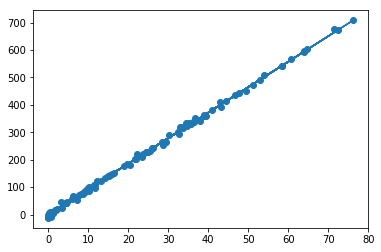

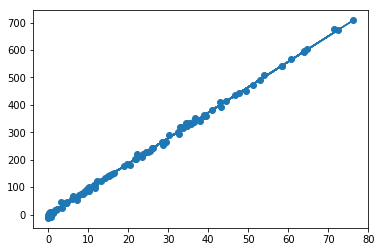

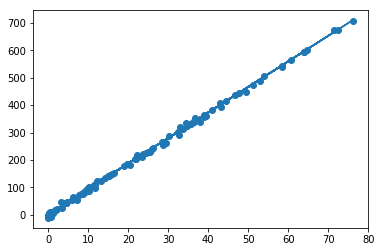

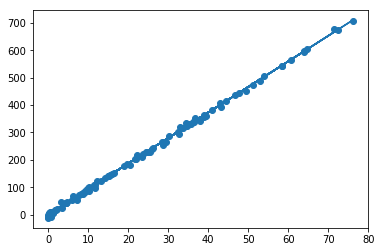

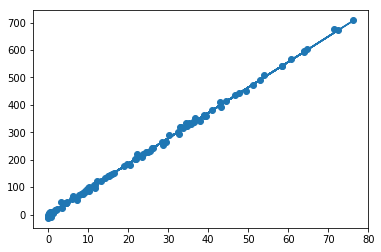

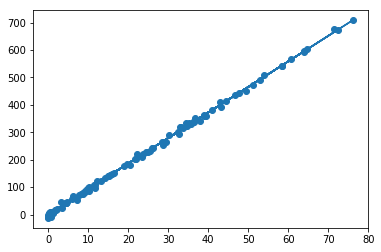

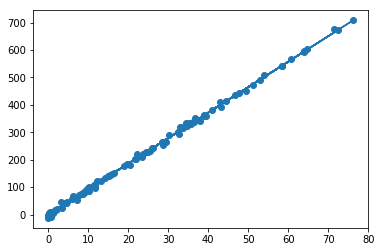

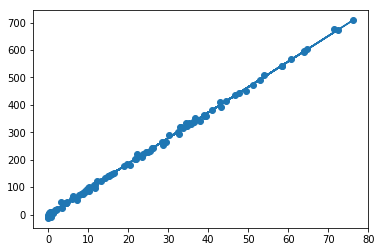

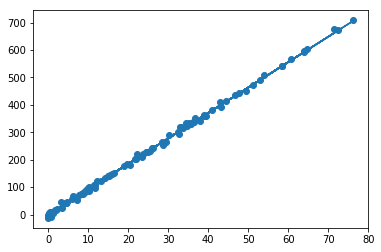

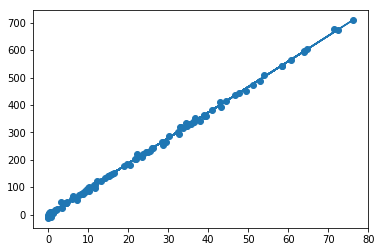

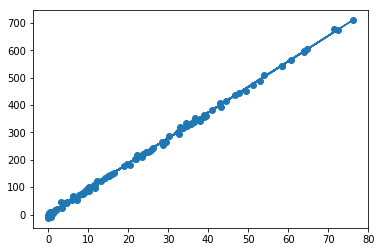

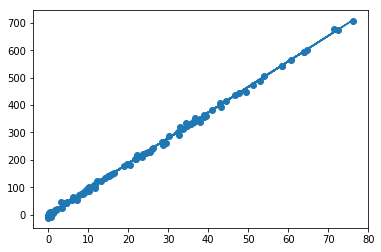

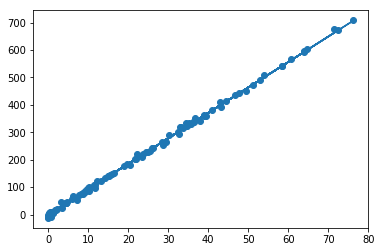

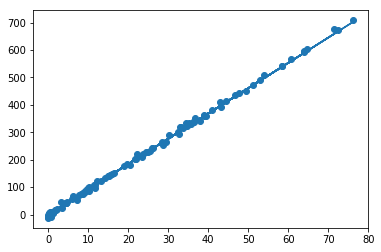

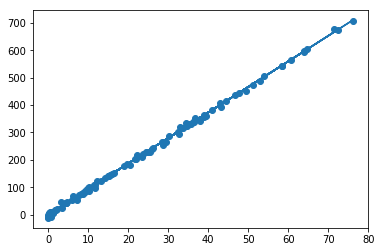

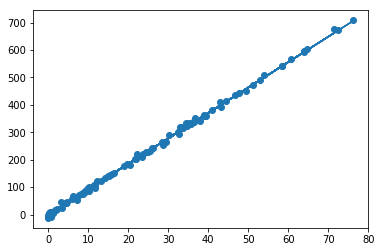

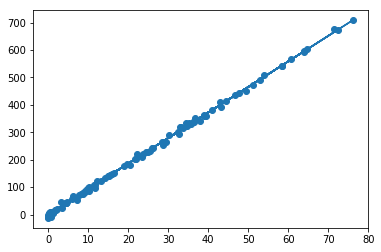

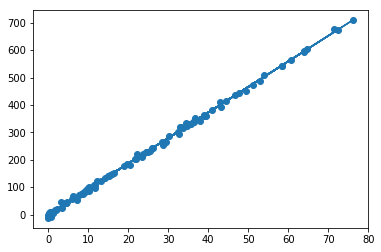

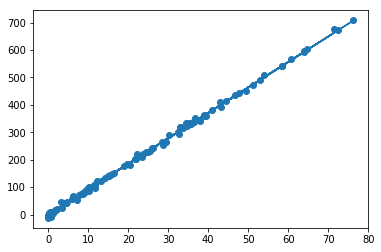

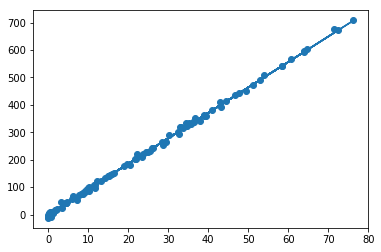

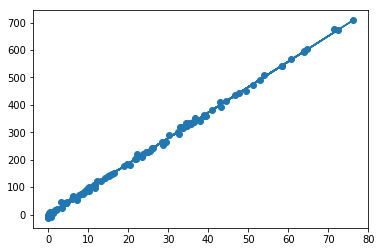

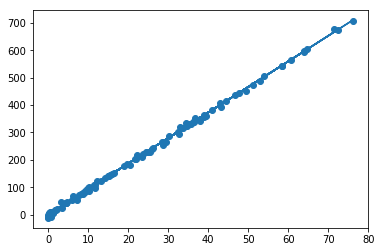

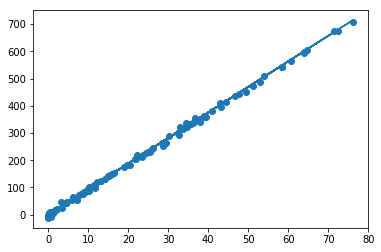

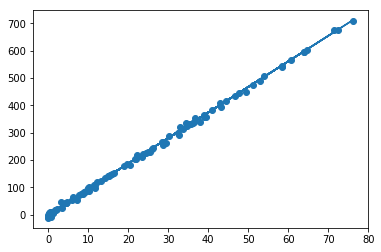

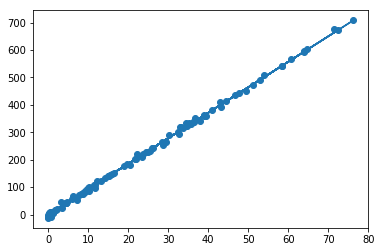

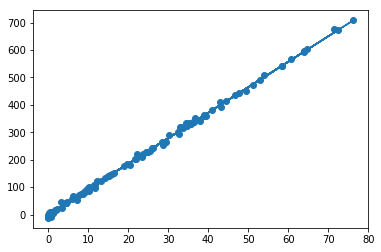

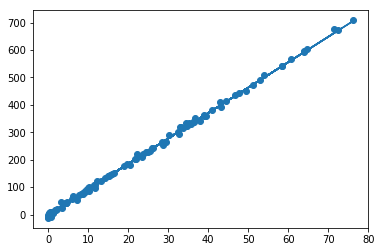

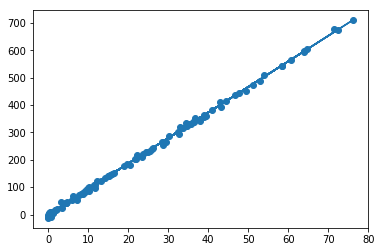

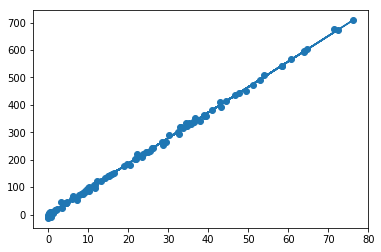

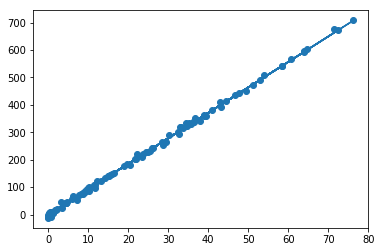

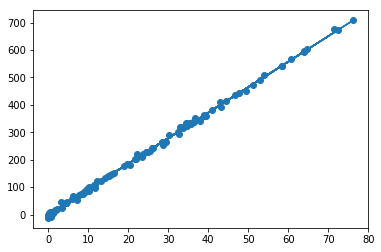

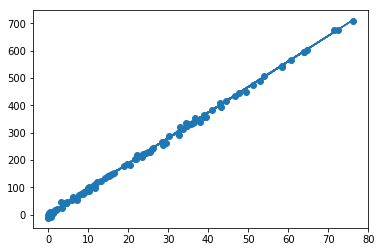

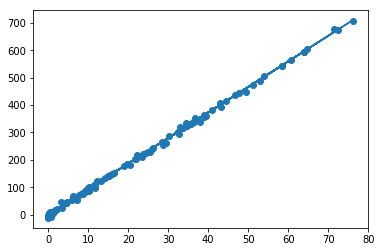

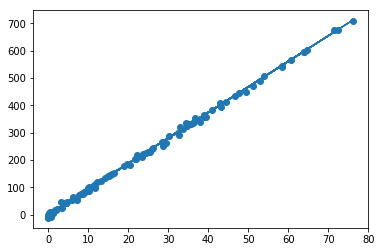

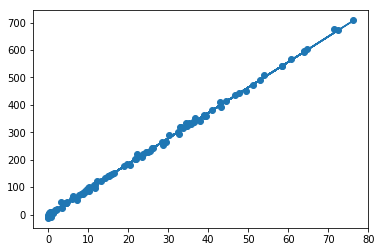

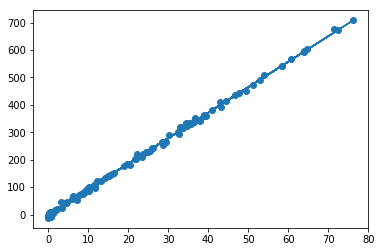

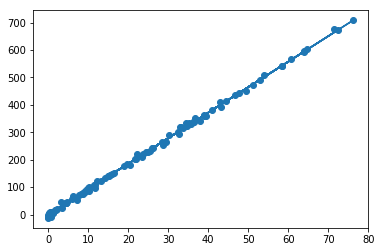

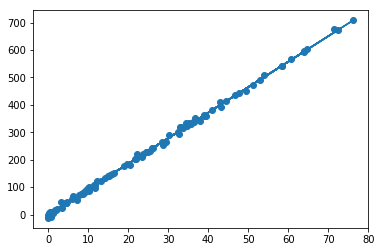

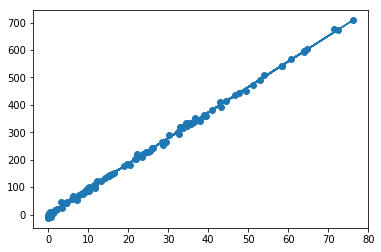

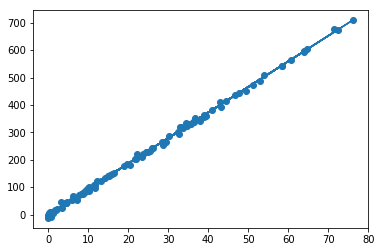

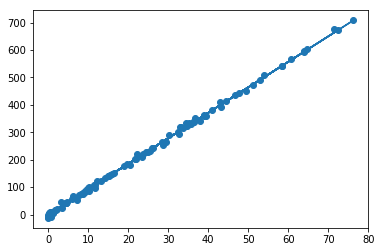

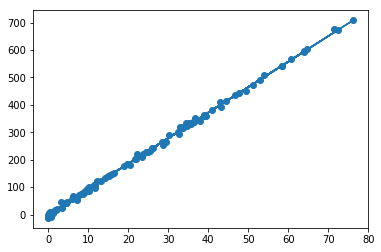

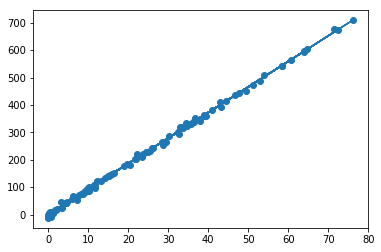

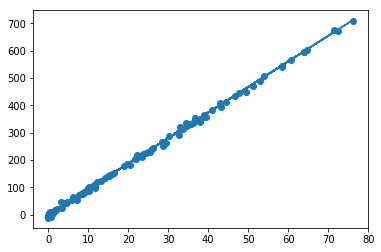

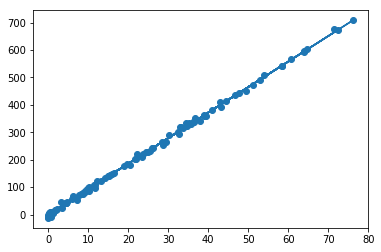

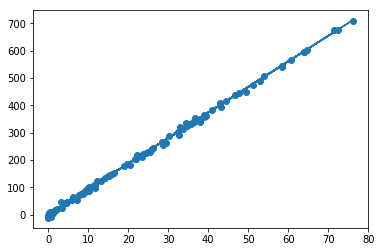

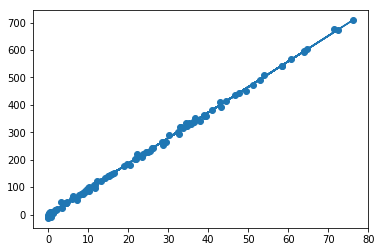

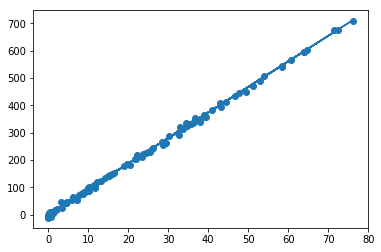

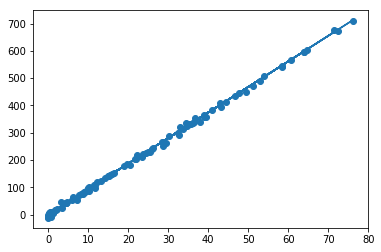

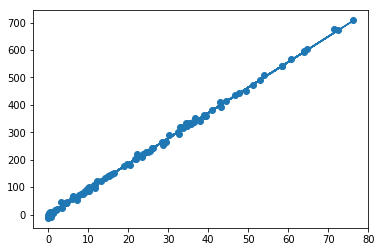

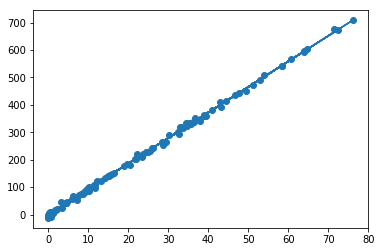

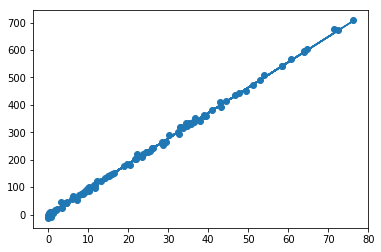

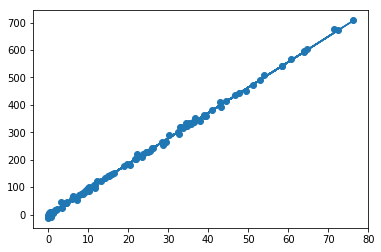

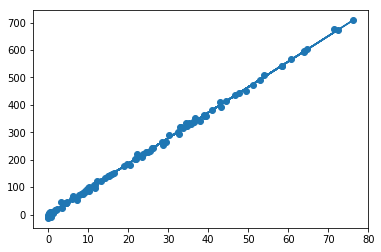

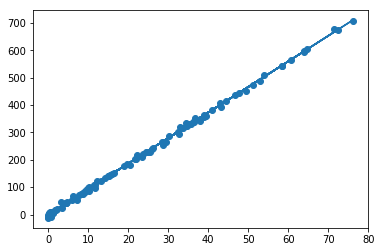

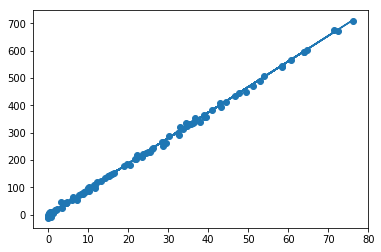

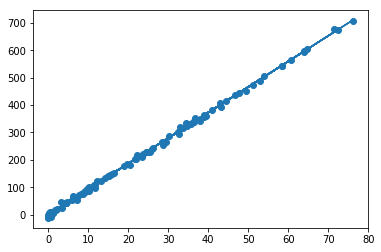

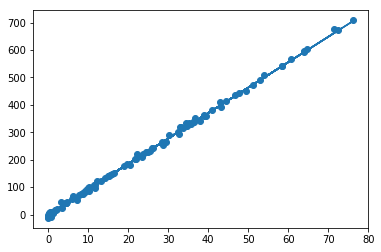

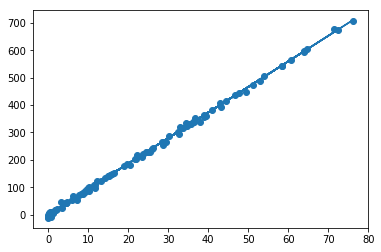

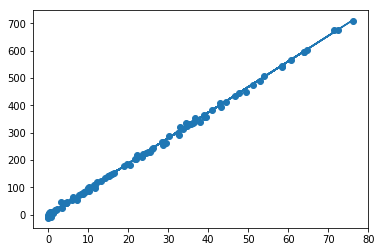

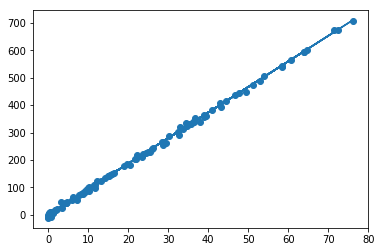

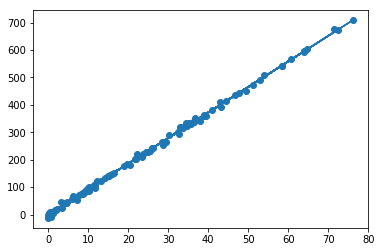

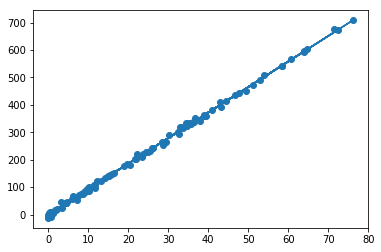

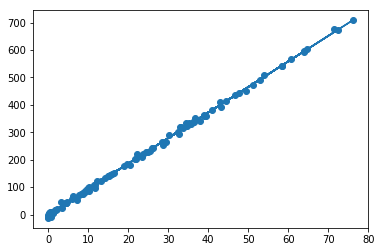

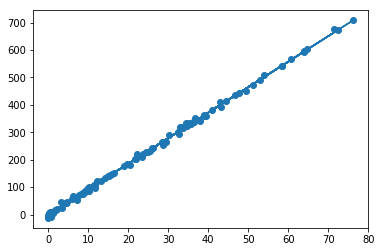

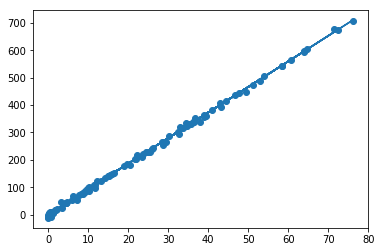

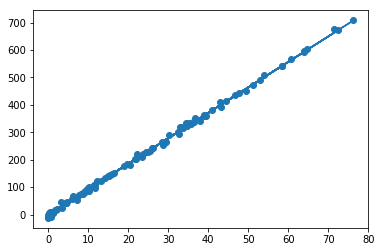

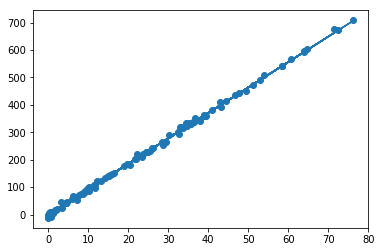

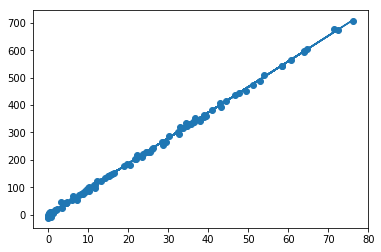

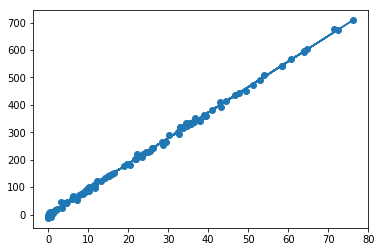

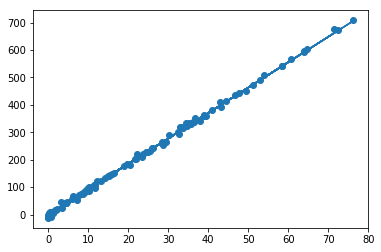

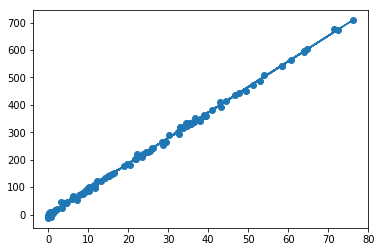

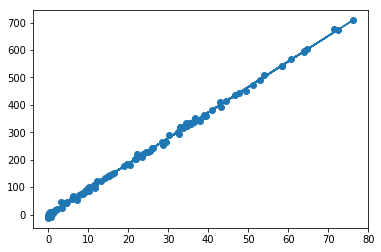

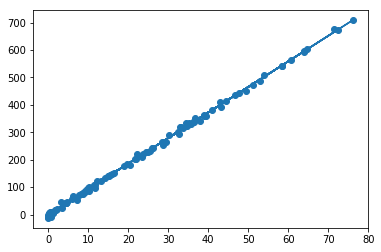

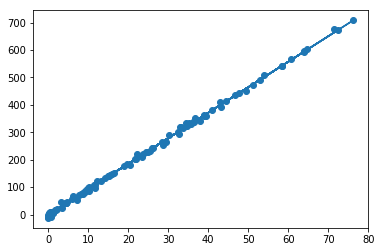

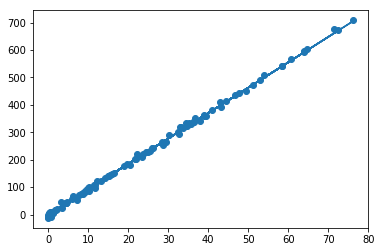

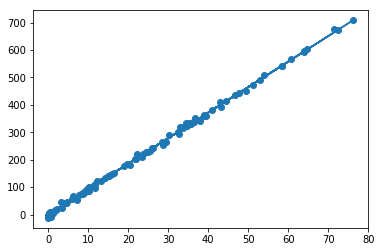

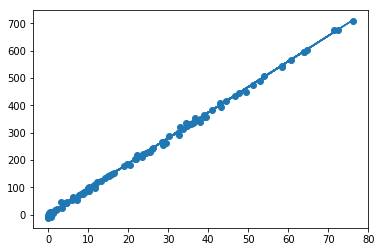

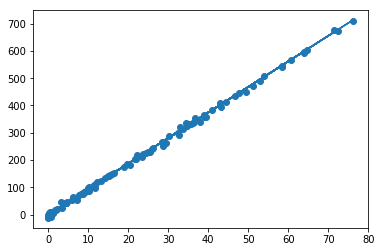

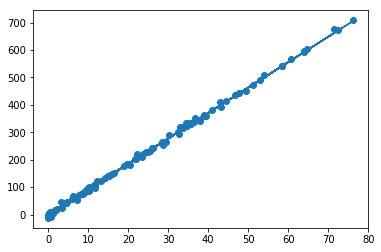

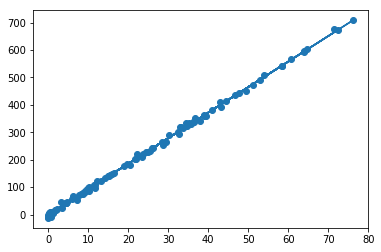

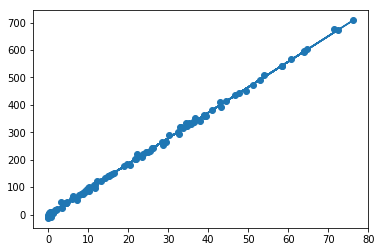

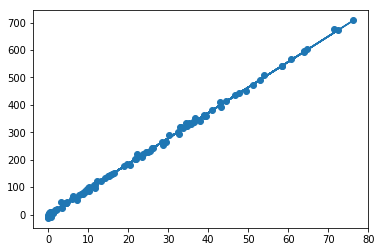

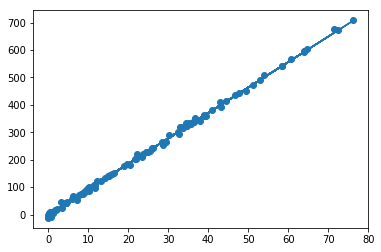

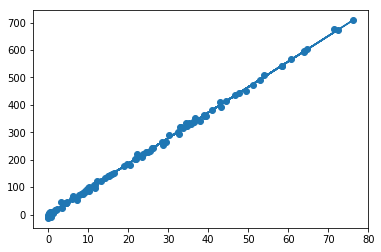

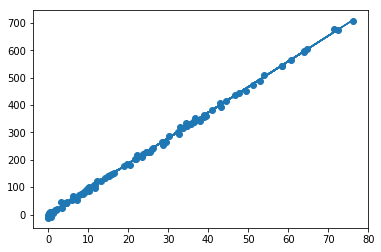

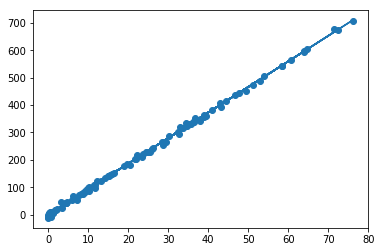

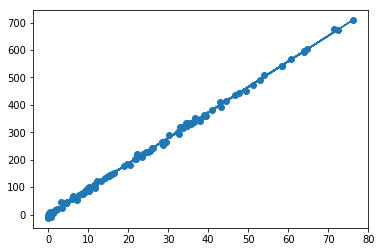

In [47]:
x_list, y_list, w, b = generate_sample_data()

lr = 0.001
max_iter = 1000
plt.scatter(x_list, y_list)
train(x_list, y_list, 50, lr, max_iter)